In [8]:
# EPR using Sampler and fake backend (simulates *noisy* quantum computer)

# More info https://quantum.cloud.ibm.com/docs/en/tutorials/hello-world

from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeFez
import numpy as np

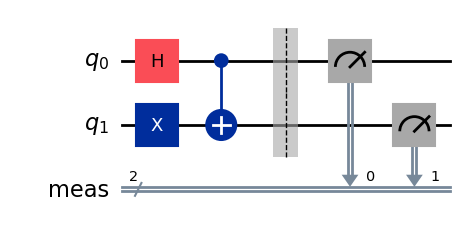

In [9]:
# Define the circuit
qc = QuantumCircuit(2)
qc.h(0)      # Hadamard
qc.x(1)      # NOT
qc.cx(0,1)   # Controlled-NOT

# Measure all the qubits
qc.measure_all()

# Draw the circuit
qc.draw("mpl")

In [10]:
be = FakeFez()
sampler = Sampler(mode=be)
sampler.options.default_shots = 1000

pm = generate_preset_pass_manager(backend=be, optimization_level=1)
isa_circuit = pm.run(qc)

# One pub, with one circuit to run.
job = sampler.run([(isa_circuit)])
result = job.result()

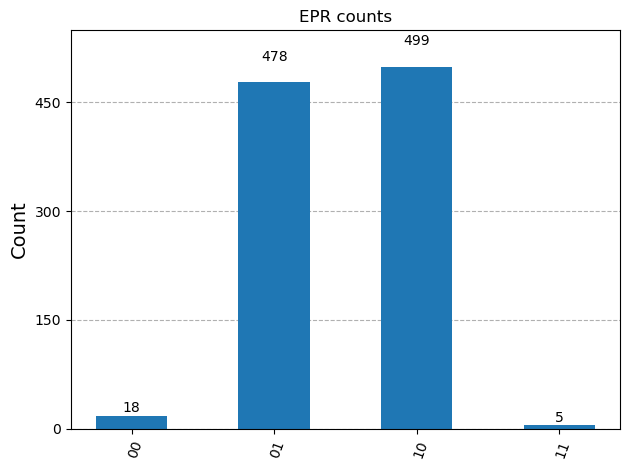

In [11]:
# Get results for the first (and only) PUB
pub_result = result[0]
counts = pub_result.data.meas.get_counts()
plot_histogram(counts, title='EPR counts')